# Common Libraries

In [1]:
if 'google.colab' in str(get_ipython()):
    !pip install feature-engine

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import seaborn as sns

# Data


In [3]:
cancer= load_breast_cancer()

In [4]:
data = pd.DataFrame(data= np.c_[cancer['data'], cancer['target']],
                     columns= list(cancer['feature_names']) + ['target'])

In [5]:
data['target'].value_counts()


1.0    357
0.0    212
Name: target, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
data.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [8]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [9]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 2, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

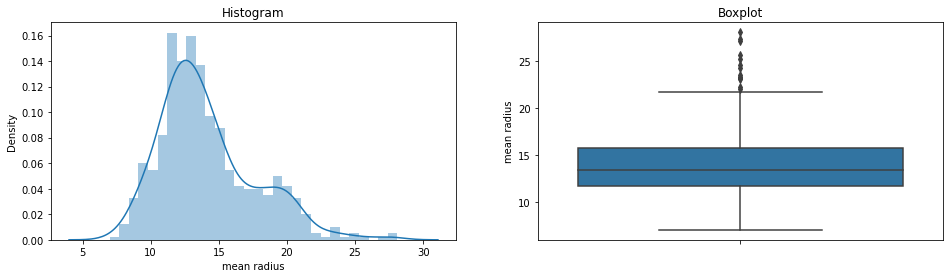

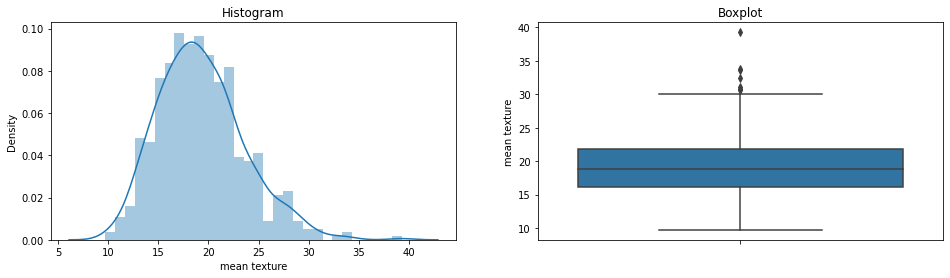

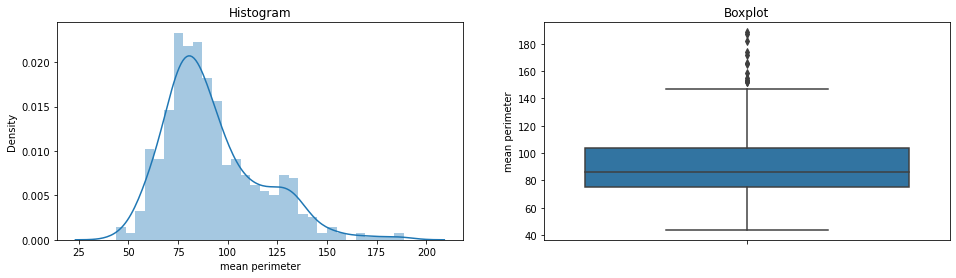

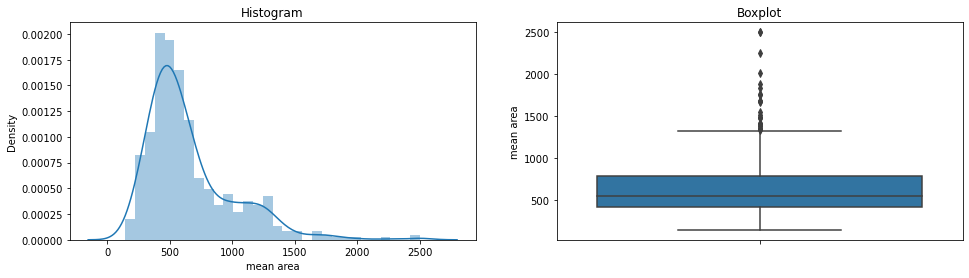

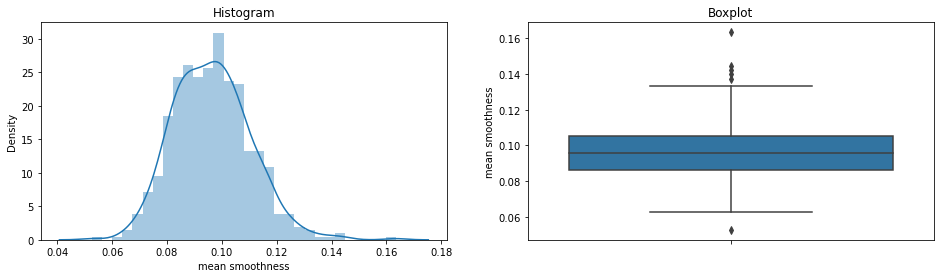

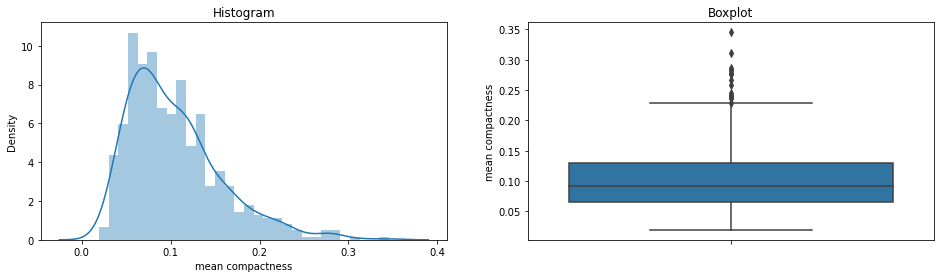

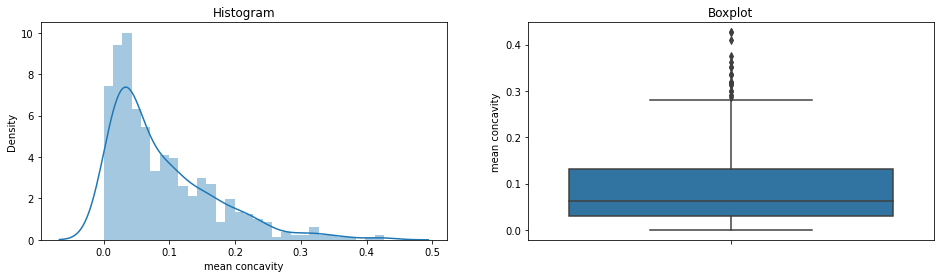

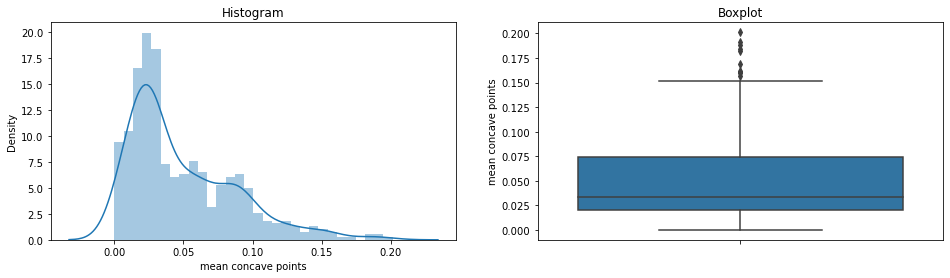

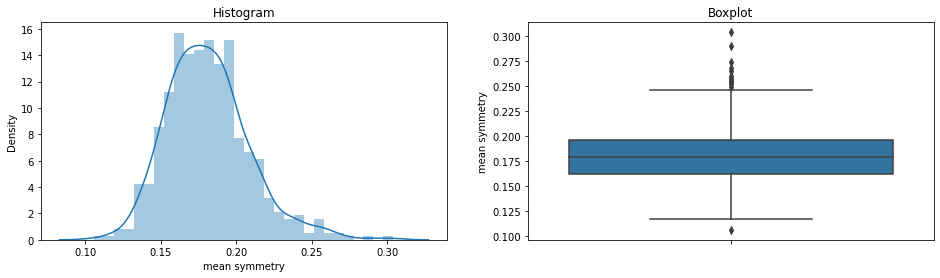

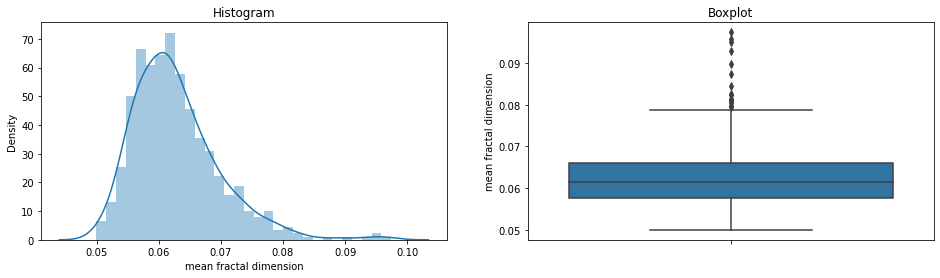

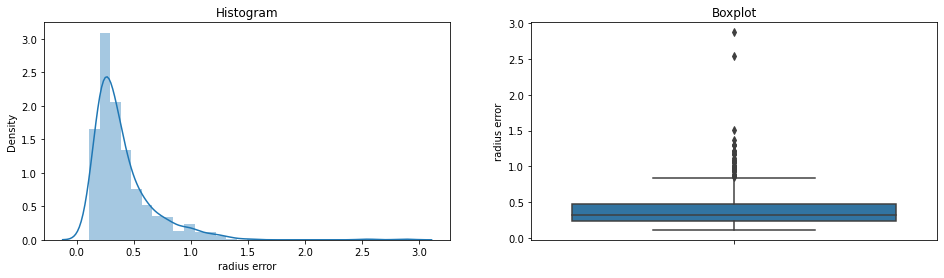

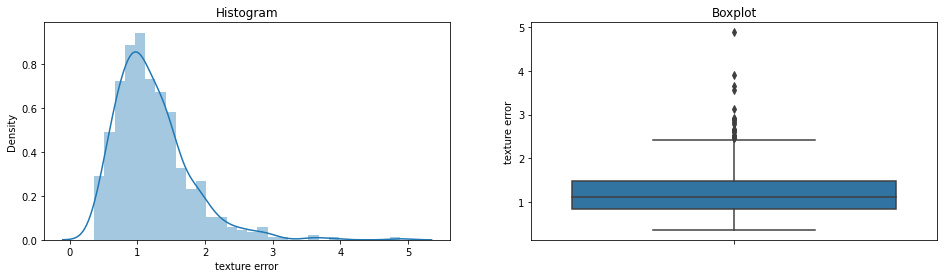

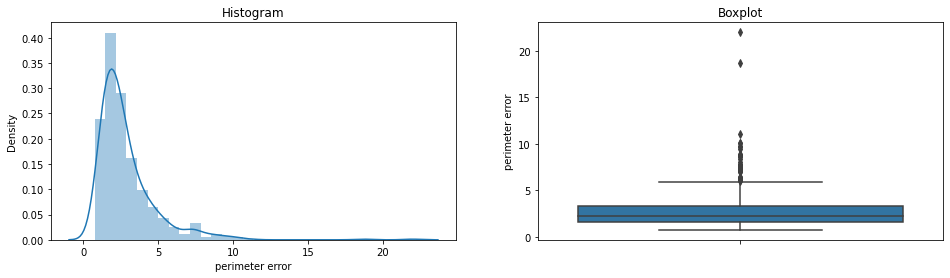

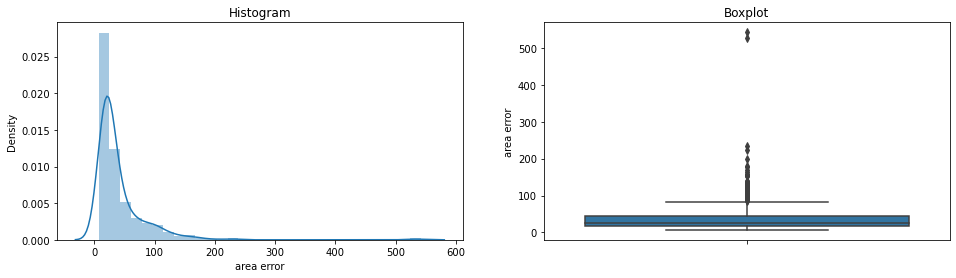

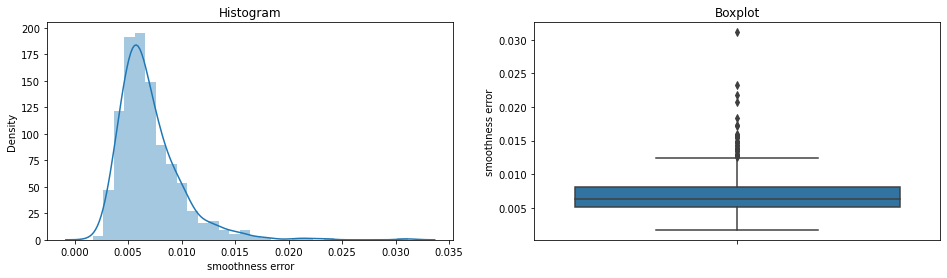

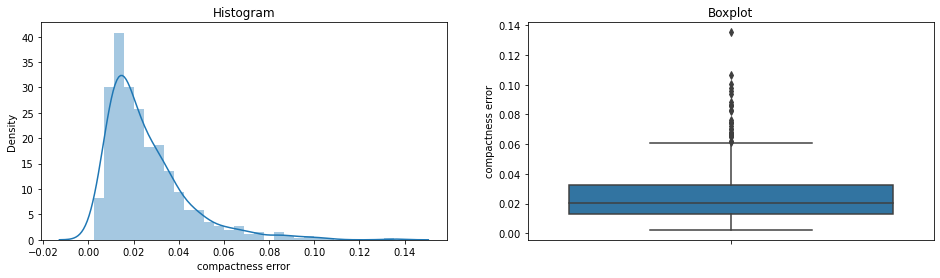

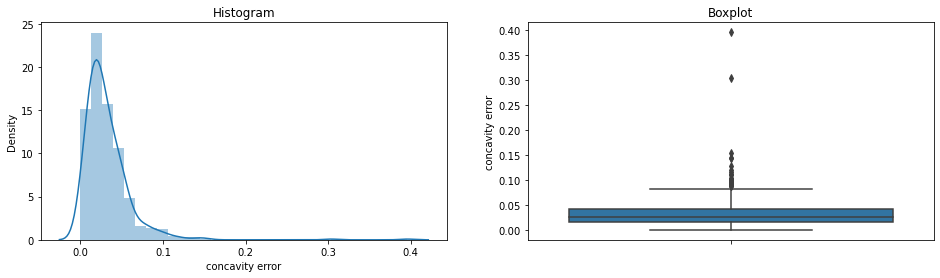

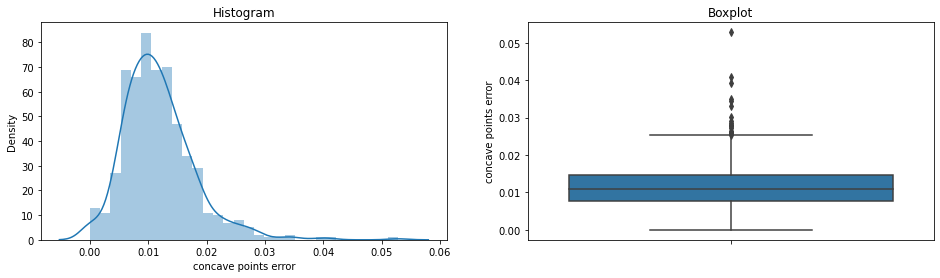

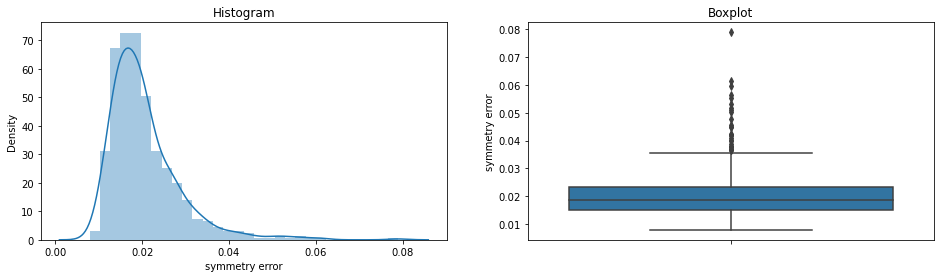

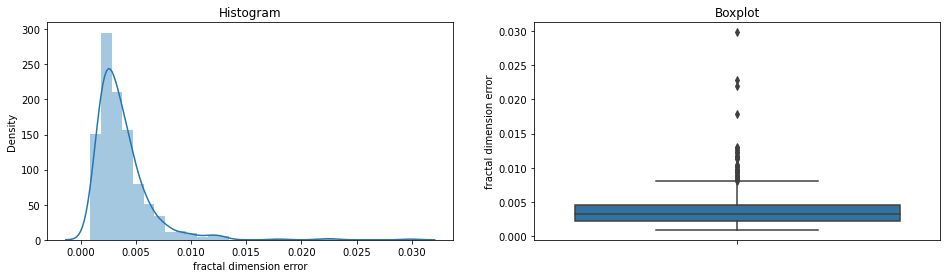

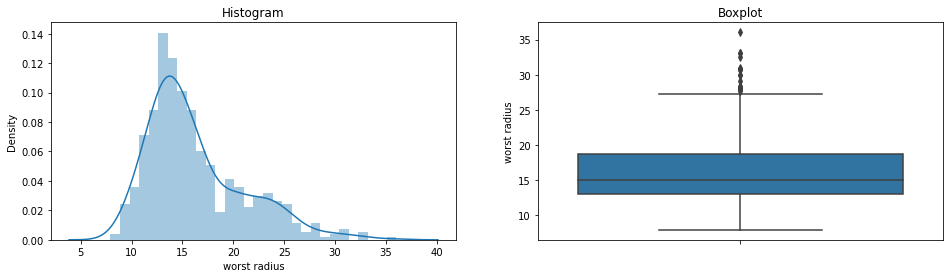

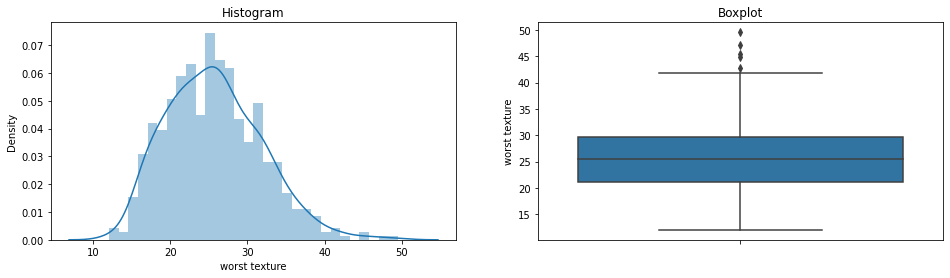

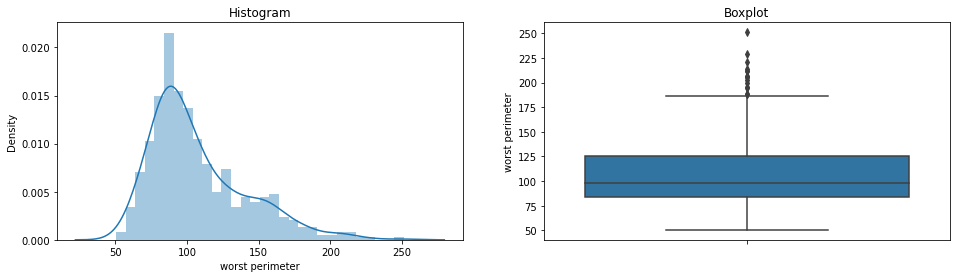

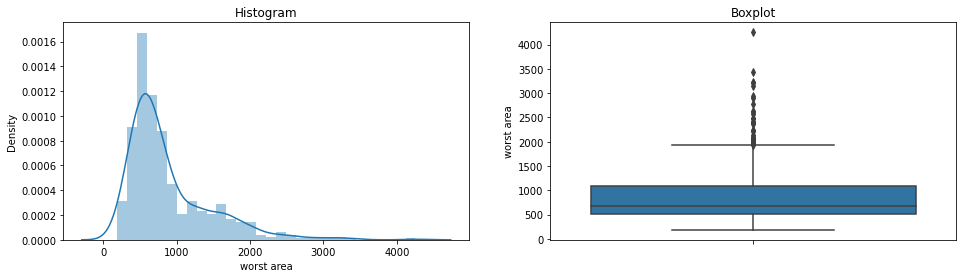

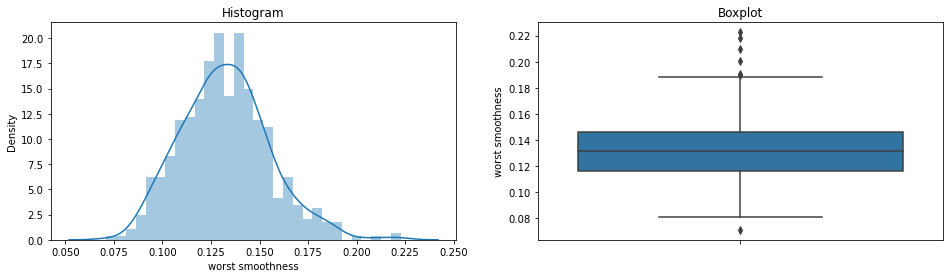

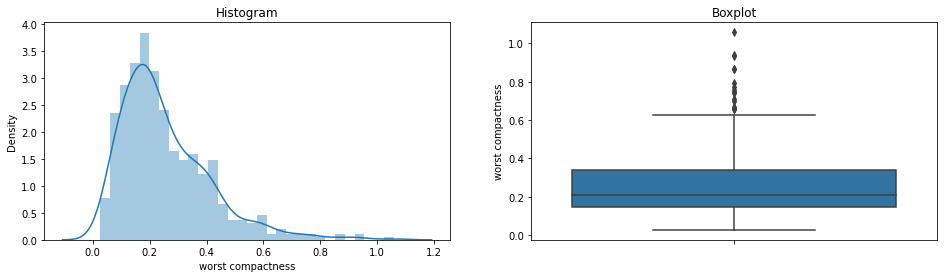

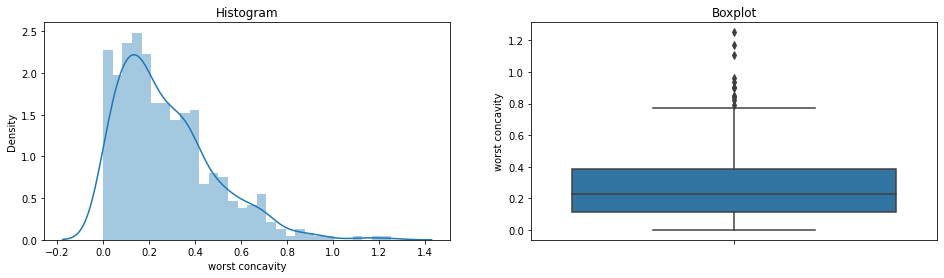

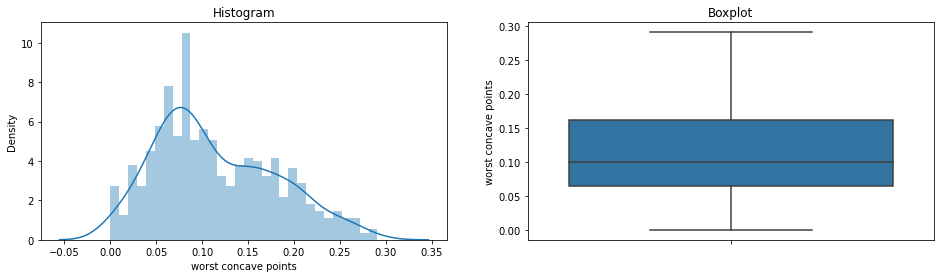

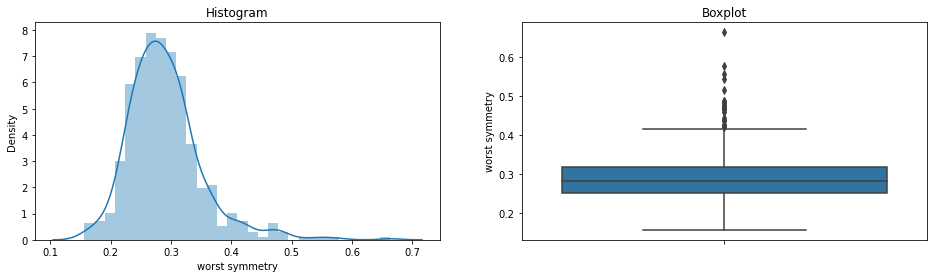

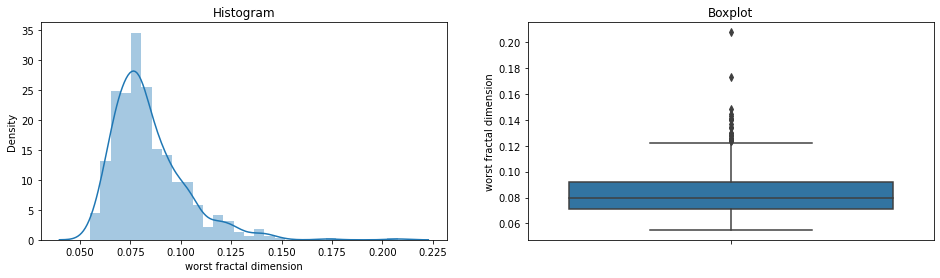

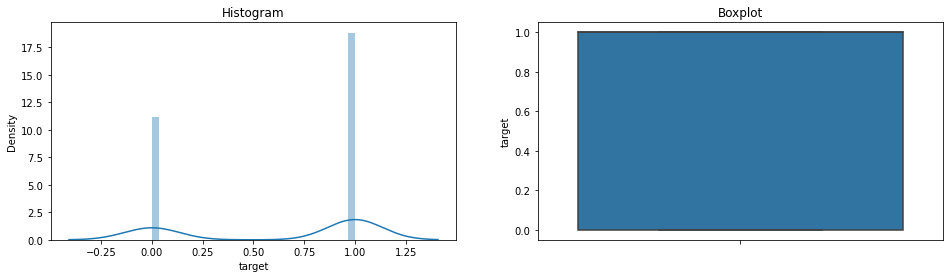

In [10]:
for var in data:
    diagnostic_plots(data, var)

# PreProcessing

In [11]:
from sklearn.model_selection import train_test_split
X_trainval, X_test, y_trainval, y_test = train_test_split(data.drop('target',axis=1), data.target, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)

In [12]:
print(f'Train size is {X_train.shape}' )
print(f'Test size is {X_test.shape}' )
print(f'Val size is {X_val.shape}' )

Train size is (341, 30)
Test size is (114, 30)
Val size is (114, 30)


In [13]:
from feature_engine.transformation import YeoJohnsonTransformer as YJT
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline

In [14]:
cancer_pipeline=Pipeline([
    ('power_transform',YJT()),
    ('scale',RobustScaler())
       
])

In [15]:
cancer_pipeline.fit(X_train)

Pipeline(steps=[('power_transform', YeoJohnsonTransformer()),
                ('scale', RobustScaler())])

In [16]:
X_train=pd.DataFrame(cancer_pipeline.transform(X_train),columns=X_train.columns)
X_test=pd.DataFrame(cancer_pipeline.transform(X_test),columns=X_test.columns)
X_val=pd.DataFrame(cancer_pipeline.transform(X_val),columns=X_val.columns)

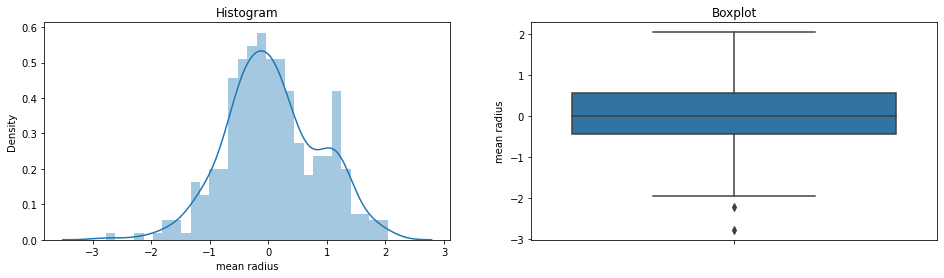

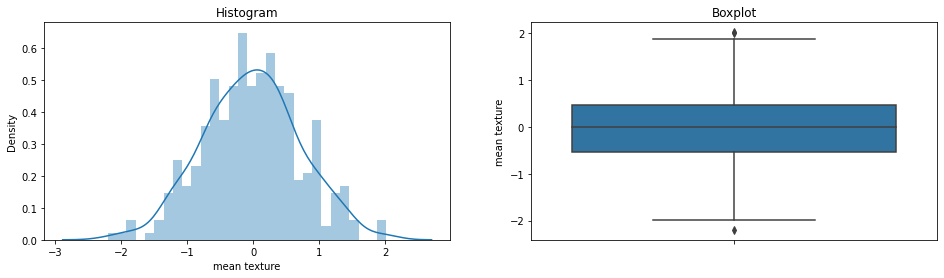

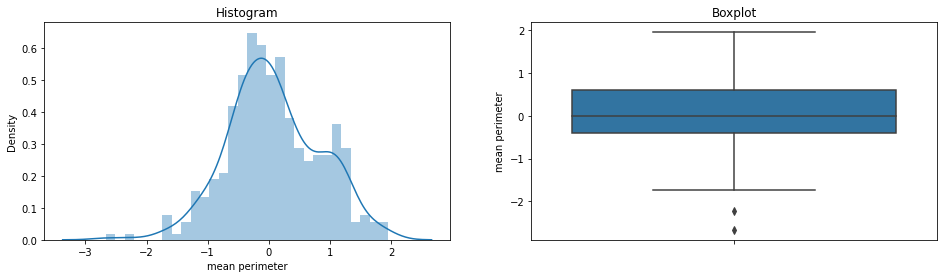

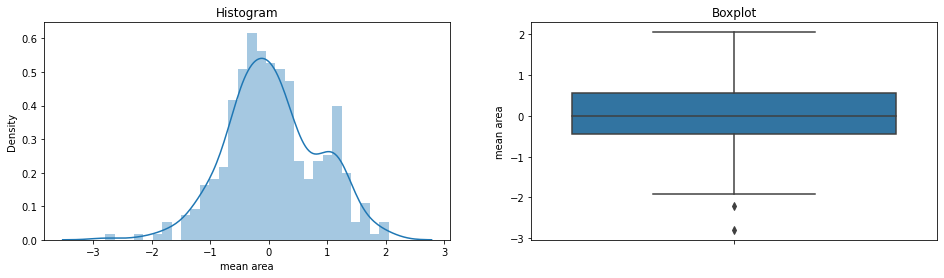

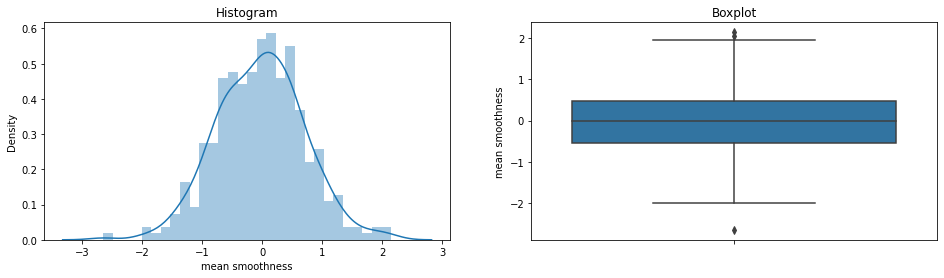

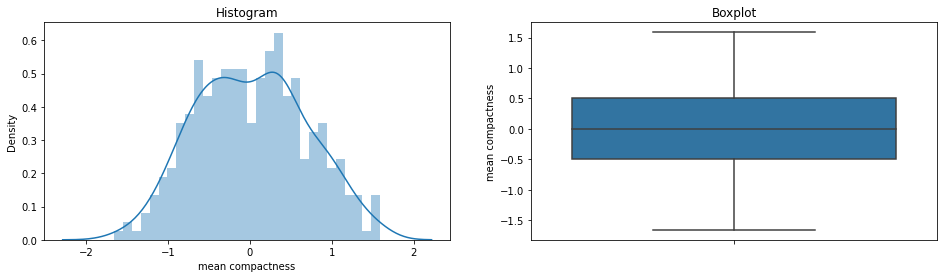

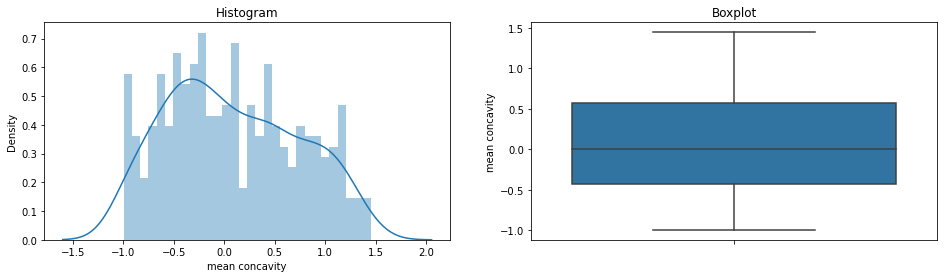

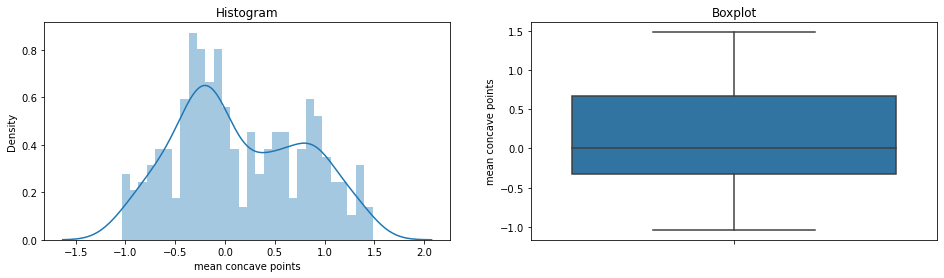

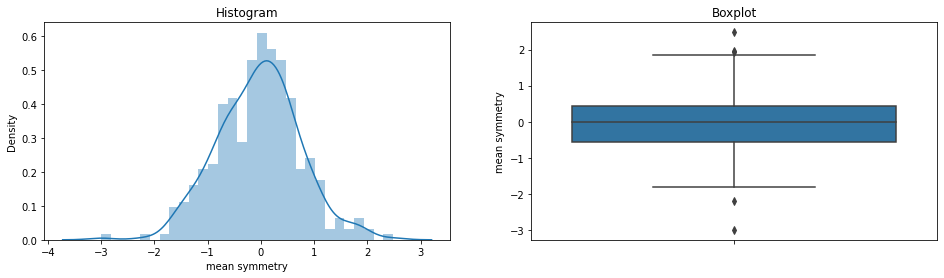

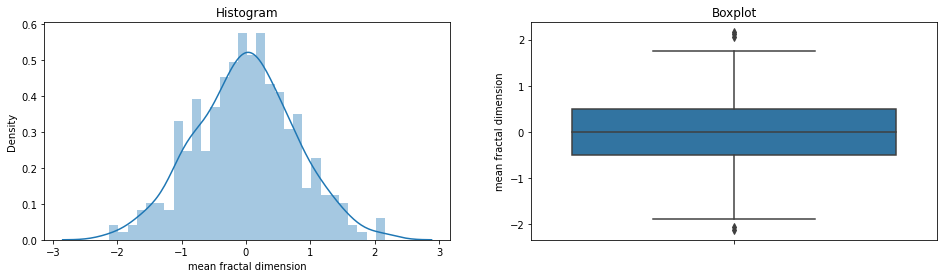

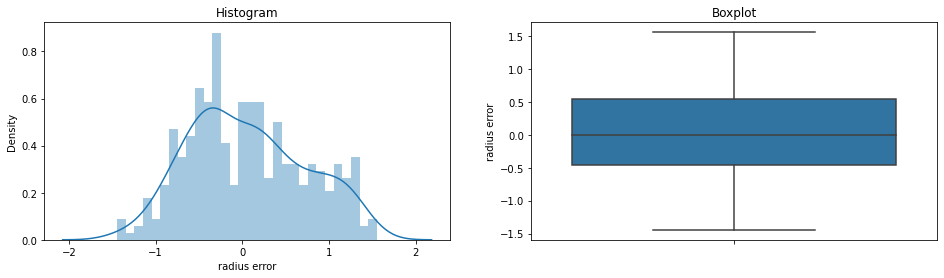

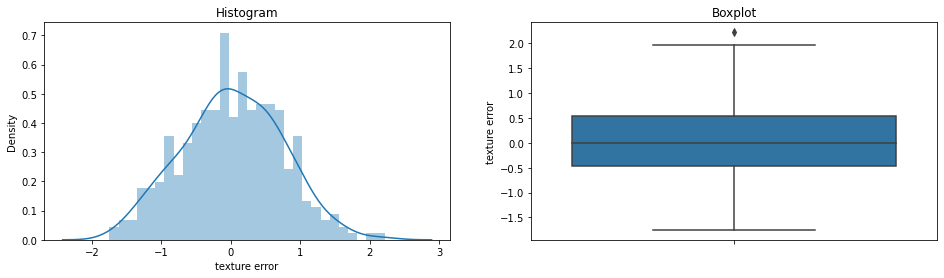

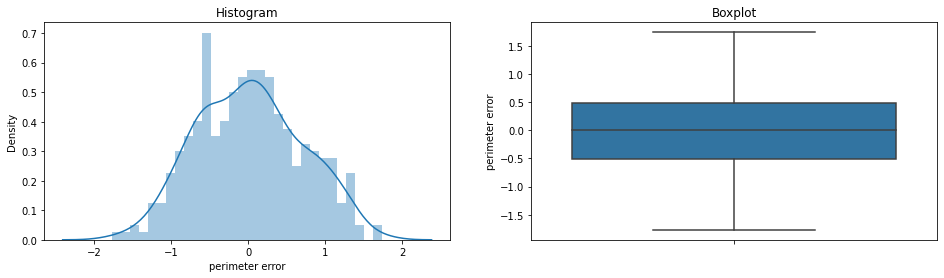

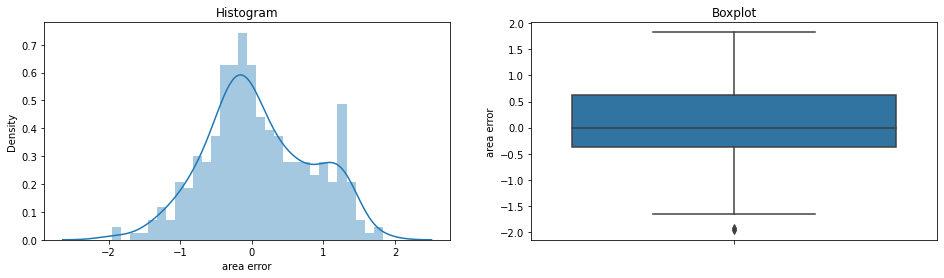

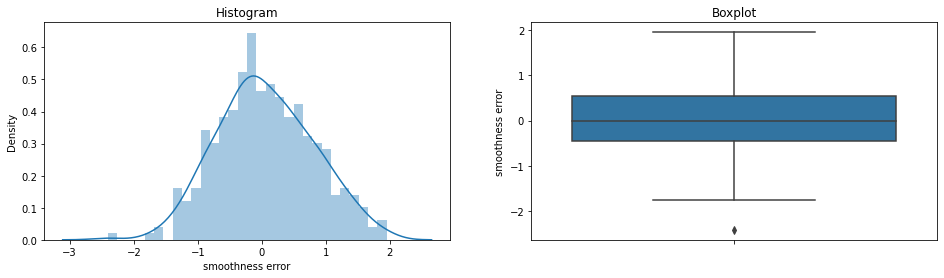

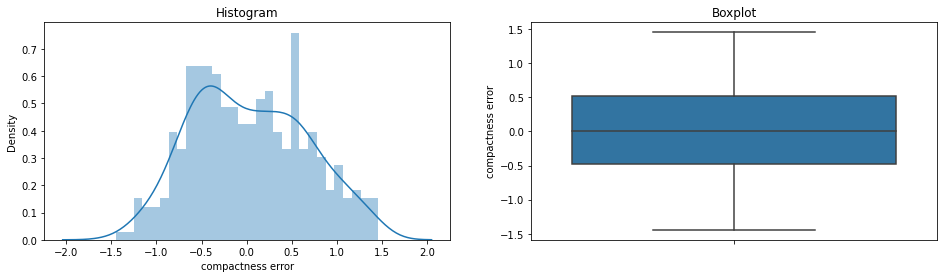

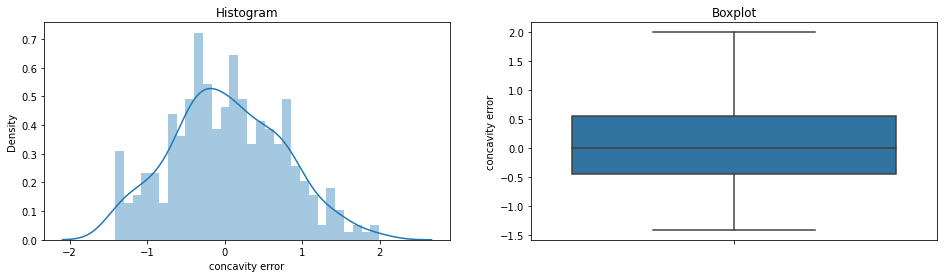

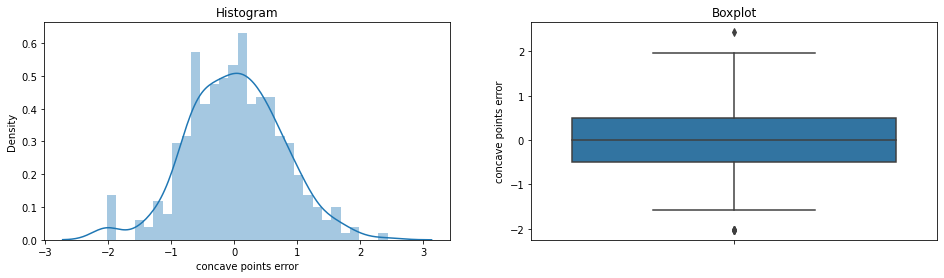

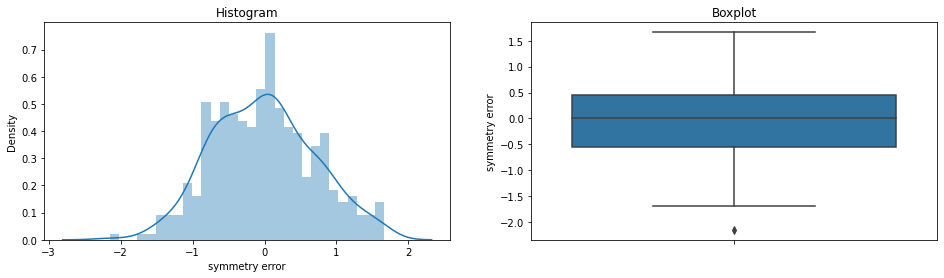

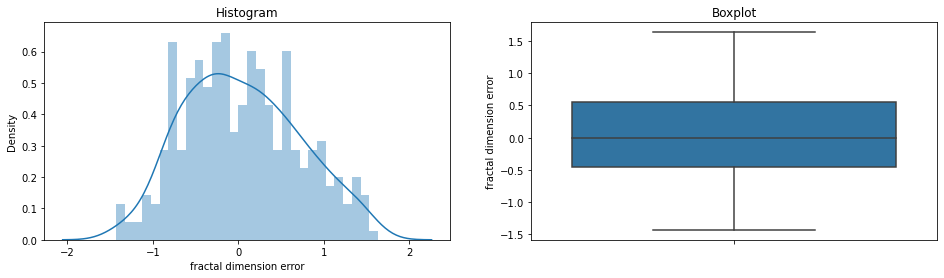

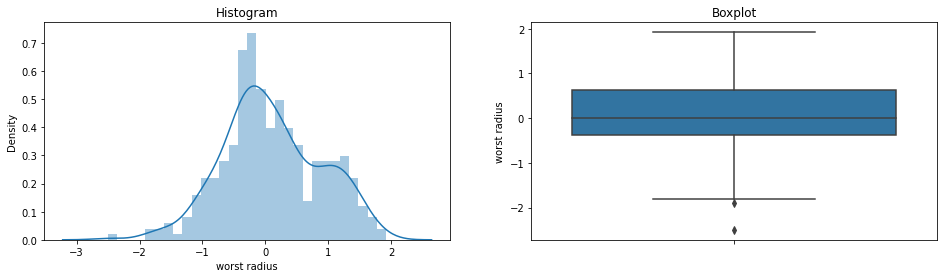

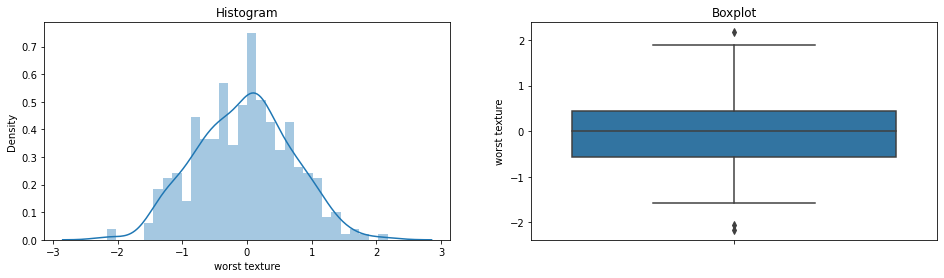

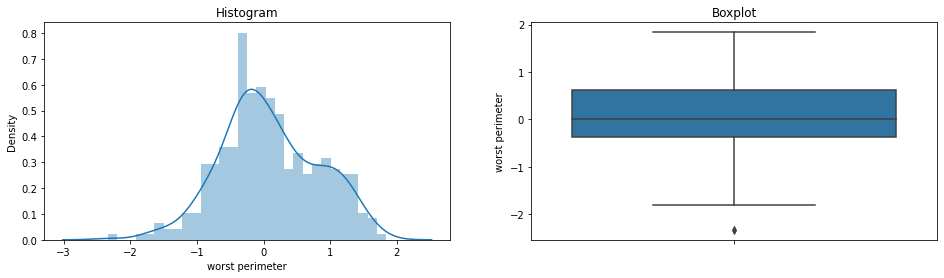

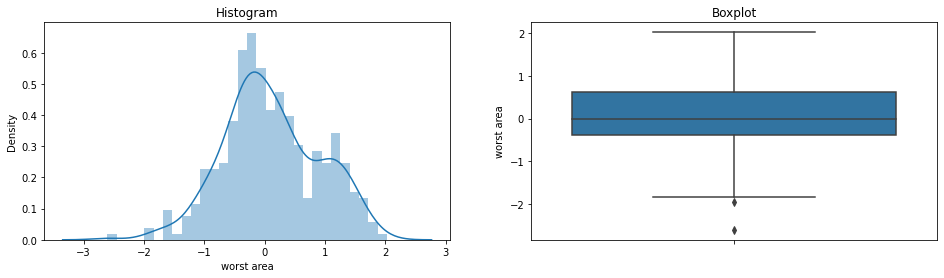

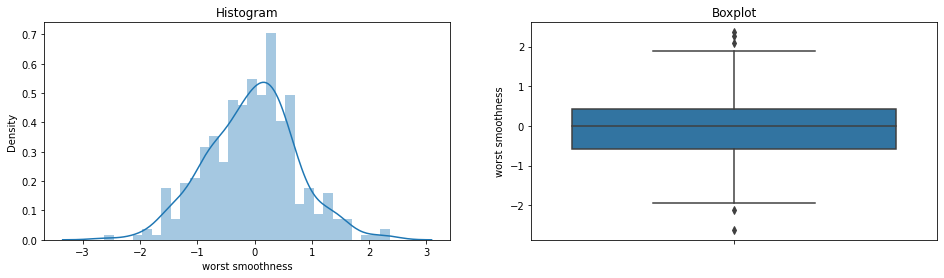

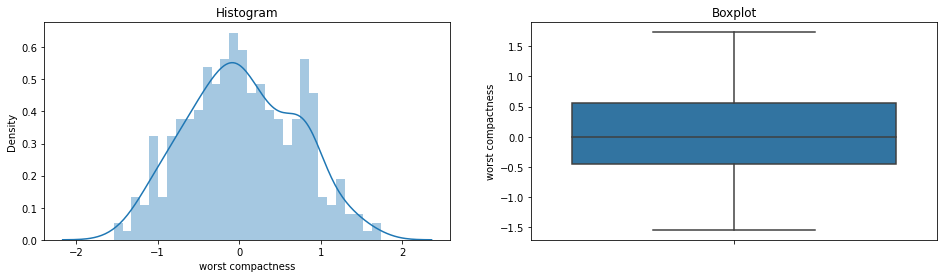

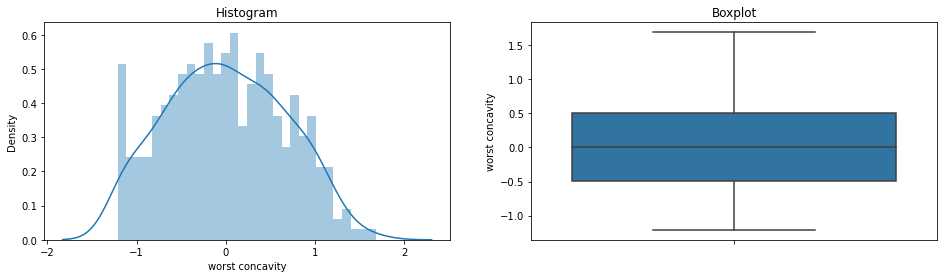

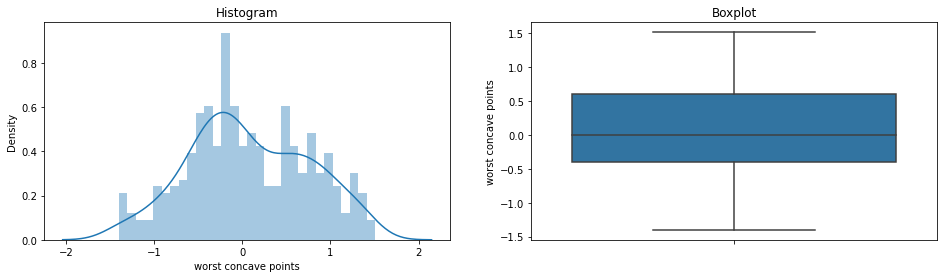

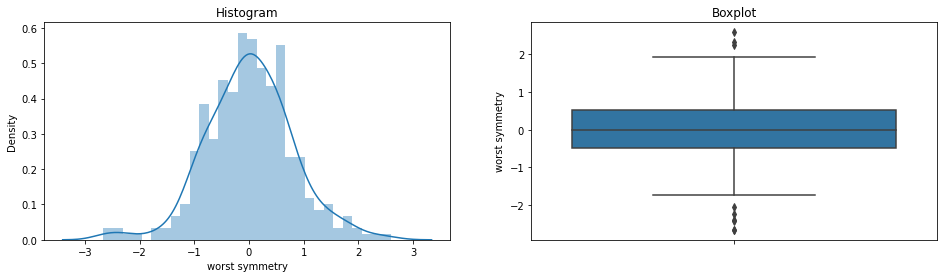

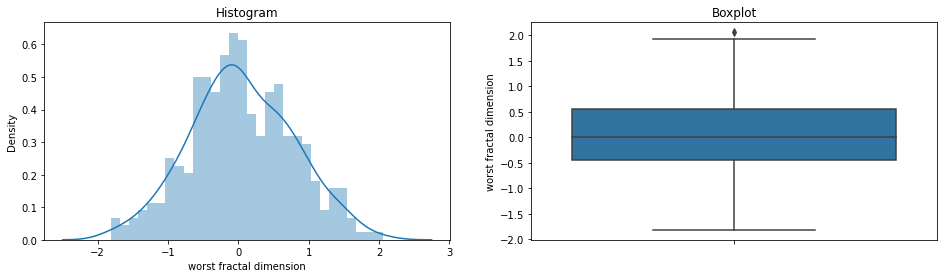

In [17]:
for var in X_train:
    diagnostic_plots(X_train, var)

# Simple Models

## KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import GridSearchCV

In [19]:
knn= KNeighborsClassifier()

knn_param= {'p': [1,2], 'n_neighbors' : range(1,20), 'weights': ['uniform','distance']}
knn_grid = GridSearchCV(knn, knn_param,cv=5, return_train_score=True, )


In [20]:
knn_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             return_train_score=True)

In [21]:
print(f'Best Mean Cross Validation Score is {knn_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {knn_grid.best_params_}')
print(f'Train score is {knn_grid.score(X_train,y_train)}')
print(f'Test score is {knn_grid.score(X_test,y_test)}')
print(f'Validation score is {knn_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.9647485080988918
Best Mean Cross Validation Score is {'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}
Train score is 0.967741935483871
Test score is 0.9473684210526315
Validation score is 0.9736842105263158


## Logistic Regresion

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
logreg=LogisticRegression(max_iter=1000)

logreg_param= {'C': [0.001,0.01,0.1,1,10,100], 'penalty': ['l1','l2']}
logreg_grid = GridSearchCV(logreg, logreg_param,cv=5, return_train_score=True, )
logreg_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             return_train_score=True)

In [ ]:
print(f'Best Mean Cross Validation Score is {logreg_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {logreg_grid.best_params_}')
print(f'Train score is {logreg_grid.score(X_train,y_train)}')
print(f'Test score is {logreg_grid.score(X_test,y_test)}')
print(f'Val score is {logreg_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.979539641943734
Best Mean Cross Validation Score is {'C': 1, 'penalty': 'l2'}
Train score is 0.9853372434017595
Test score is 0.9649122807017544
Val score is 0.9649122807017544


## Linear SVC

In [24]:
from sklearn.svm import SVC

In [25]:
lsvc=SVC(kernel='linear',probability=True)
lsvc_param= {'C': [0.001,0.01,0.1,1,10,100],}
lsvc_grid = GridSearchCV(lsvc, lsvc_param,cv=5, return_train_score=True, )
lsvc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear', probability=True),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [26]:
print(f'Best Mean Cross Validation Score is {lsvc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {lsvc_grid.best_params_}')
print(f'Train score is {lsvc_grid.score(X_train,y_train)}')
print(f'Test score is {lsvc_grid.score(X_test,y_test)}')
print(f'Val score is {lsvc_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.9794543904518329
Best Mean Cross Validation Score is {'C': 100}
Train score is 1.0
Test score is 0.956140350877193
Val score is 0.9385964912280702


## Kernel SVC

In [27]:
from sklearn.svm import SVC

In [28]:
ksvc=SVC(probability=True)
ksvc_param = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             
              {'kernel': ['poly'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
              'degree' : range(1,5)},
             
             {'kernel': ['sigmoid'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}]

ksvc_grid = GridSearchCV(ksvc, ksvc_param,cv=5, return_train_score=True, )
ksvc_grid.fit(X_train,y_train)
             

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['rbf']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'degree': range(1, 5),
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['poly']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['sigmoid']}],
             return_train_score=True)

In [29]:
print(f'Best Mean Cross Validation Score is {ksvc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {ksvc_grid.best_params_}')
print(f'Train score is {ksvc_grid.score(X_train,y_train)}')
print(f'Test score is {ksvc_grid.score(X_test,y_test)}')
print(f'Val score is {ksvc_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.9794970161977835
Best Mean Cross Validation Score is {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Train score is 0.9882697947214076
Test score is 0.9824561403508771
Val score is 0.9649122807017544


## Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dtree = DecisionTreeClassifier()
dtree_param = {"max_depth": range(1,10),
           "min_samples_split": range(2,10,1),
           "max_leaf_nodes": range(2,6),
              "splitter": ["best", "random"]}
dtree_grid = GridSearchCV(dtree, dtree_param,cv=5, return_train_score=True, )
dtree_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 10),
                         'max_leaf_nodes': range(2, 6),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             return_train_score=True)

In [32]:
print(f'Best Mean Cross Validation Score is {dtree_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {dtree_grid.best_params_}')
print(f'Train score is {dtree_grid.score(X_train,y_train)}')
print(f'Test score is {dtree_grid.score(X_test,y_test)}')
print(f'Val score is {dtree_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.9355498721227621
Best Mean Cross Validation Score is {'max_depth': 8, 'max_leaf_nodes': 5, 'min_samples_split': 3, 'splitter': 'random'}
Train score is 0.9178885630498533
Test score is 0.9122807017543859
Val score is 0.8771929824561403


# Ensemble Models

## Bagging

In [33]:
from sklearn.ensemble import BaggingClassifier

In [34]:
bag_dtree1 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=True, random_state=0, oob_score=True)

bag_dtree1_param = {
                 'base_estimator__max_depth': range(1,10),
                 'max_samples':  [0.8,1],
                 'n_estimators': [10,25,100]}
bag_dtree1_grid = GridSearchCV(bag_dtree1, bag_dtree1_param,cv=5, return_train_score=True, )
bag_dtree1_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                         oob_score=True, random_state=0),
             param_grid={'base_estimator__max_depth': range(1, 10),
                         'max_samples': [0.8, 1],
                         'n_estimators': [10, 25, 100]},
             return_train_score=True)

In [36]:
print(f'Best Mean Cross Validation Score is {bag_dtree1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {bag_dtree1_grid.best_params_}')
print(f'Train score is {bag_dtree1_grid.score(X_train,y_train)}')
print(f'Test score is {bag_dtree1_grid.score(X_test,y_test)}')
print(f'Val score is {bag_dtree1_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.9442881500426257
Best Mean Cross Validation Score is {'base_estimator__max_depth': 7, 'max_samples': 0.8, 'n_estimators': 25}
Train score is 0.9970674486803519
Test score is 0.9649122807017544
Val score is 0.956140350877193


In [37]:
bag_dtree2 = BaggingClassifier(DecisionTreeClassifier(max_depth= 8, max_leaf_nodes=5, min_samples_split= 3, splitter= 'random'), bootstrap=True, random_state=0, oob_score=True)

bag_dtree2_param = {
                 'max_samples':  [0.8,1],
                 'n_estimators': [10,25,100]}
bag_dtree2_grid = GridSearchCV(bag_dtree2, bag_dtree2_param,cv=5, return_train_score=True, )
bag_dtree2_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=8,
                                                                               max_leaf_nodes=5,
                                                                               min_samples_split=3,
                                                                               splitter='random'),
                                         oob_score=True, random_state=0),
             param_grid={'max_samples': [0.8, 1],
                         'n_estimators': [10, 25, 100]},
             return_train_score=True)

In [38]:
print(f'Best Mean Cross Validation Score is {bag_dtree2_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {bag_dtree2_grid.best_params_}')
print(f'Train score is {bag_dtree2_grid.score(X_train,y_train)}')
print(f'Test score is {bag_dtree2_grid.score(X_test,y_test)}')
print(f'Val score is {bag_dtree2_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.9442881500426257
Best Mean Cross Validation Score is {'max_samples': 0.8, 'n_estimators': 25}
Train score is 0.9560117302052786
Test score is 0.9473684210526315
Val score is 0.9473684210526315


In [39]:
bag_logreg1 = BaggingClassifier(base_estimator=LogisticRegression(), bootstrap=True, random_state=0, oob_score=True)

bag_logreg1_param = {
                 'base_estimator__C': [0.001,0.01,0.1,1,10,100],
                 'max_samples':  [0.8,1],
                 'n_estimators': [10,25,100]}
bag_logreg1_grid = GridSearchCV(bag_logreg1, bag_logreg1_param,cv=5, return_train_score=True, )
bag_logreg1_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=LogisticRegression(),
                                         oob_score=True, random_state=0),
             param_grid={'base_estimator__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_samples': [0.8, 1],
                         'n_estimators': [10, 25, 100]},
             return_train_score=True)

In [40]:
print(f'Best Mean Cross Validation Score is {bag_logreg1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {bag_logreg1_grid.best_params_}')
print(f'Train score is {bag_logreg1_grid.score(X_train,y_train)}')
print(f'Test score is {bag_logreg1_grid.score(X_test,y_test)}')
print(f'Val score is {bag_logreg1_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.9736999147485081
Best Mean Cross Validation Score is {'base_estimator__C': 1, 'max_samples': 0.8, 'n_estimators': 100}
Train score is 0.9882697947214076
Test score is 0.9649122807017544
Val score is 0.9736842105263158


## Pasting

In [41]:
paste_dtree1 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=False, random_state=0, oob_score=False)

paste_dtree1_param = {
                 'base_estimator__max_depth': range(1,10),
                 'max_samples':  [0.8,1],
                 'n_estimators': [10,25,100]}
paste_dtree1_grid = GridSearchCV(paste_dtree1, paste_dtree1_param,cv=5, return_train_score=True, )
paste_dtree1_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                         bootstrap=False, random_state=0),
             param_grid={'base_estimator__max_depth': range(1, 10),
                         'max_samples': [0.8, 1],
                         'n_estimators': [10, 25, 100]},
             return_train_score=True)

In [42]:
print(f'Best Mean Cross Validation Score is {paste_dtree1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {paste_dtree1_grid.best_params_}')
print(f'Train score is {paste_dtree1_grid.score(X_train,y_train)}')
print(f'Test score is {paste_dtree1_grid.score(X_test,y_test)}')
print(f'Val score is {paste_dtree1_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.9356351236146633
Best Mean Cross Validation Score is {'base_estimator__max_depth': 7, 'max_samples': 0.8, 'n_estimators': 10}
Train score is 0.9970674486803519
Test score is 0.9473684210526315
Val score is 0.9122807017543859


In [43]:
paste_dtree2 = BaggingClassifier(DecisionTreeClassifier(max_depth= 8, max_leaf_nodes=5, min_samples_split= 3, splitter= 'random'), bootstrap=False, random_state=0, oob_score=False)

paste_dtree2_param = {
                 'max_samples':  [0.8,1],
                 'n_estimators': [10,25,100]}
paste_dtree2_grid = GridSearchCV(paste_dtree2, paste_dtree2_param,cv=5, return_train_score=True, )
paste_dtree2_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=8,
                                                                               max_leaf_nodes=5,
                                                                               min_samples_split=3,
                                                                               splitter='random'),
                                         bootstrap=False, random_state=0),
             param_grid={'max_samples': [0.8, 1],
                         'n_estimators': [10, 25, 100]},
             return_train_score=True)

In [44]:
print(f'Best Mean Cross Validation Score is {paste_dtree2_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {paste_dtree2_grid.best_params_}')
print(f'Train score is {paste_dtree2_grid.score(X_train,y_train)}')
print(f'Test score is {paste_dtree2_grid.score(X_test,y_test)}')
print(f'Val score is {paste_dtree2_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.9501278772378516
Best Mean Cross Validation Score is {'max_samples': 0.8, 'n_estimators': 25}
Train score is 0.9618768328445748
Test score is 0.956140350877193
Val score is 0.956140350877193


In [45]:
paste_logreg1 = BaggingClassifier(base_estimator=LogisticRegression(), bootstrap=False, random_state=0, oob_score=False)

paste_logreg1_param = {
                 'base_estimator__C': [0.001,0.01,0.1,1,10,100],
                 'max_samples':  [0.8,1],
                 'n_estimators': [10,25,100]}
paste_logreg1_grid = GridSearchCV(paste_logreg1, paste_logreg1_param,cv=5, return_train_score=True, )
paste_logreg1_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=LogisticRegression(),
                                         bootstrap=False, random_state=0),
             param_grid={'base_estimator__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_samples': [0.8, 1],
                         'n_estimators': [10, 25, 100]},
             return_train_score=True)

In [46]:
print(f'Best Mean Cross Validation Score is {paste_logreg1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {paste_logreg1_grid.best_params_}')
print(f'Train score is {paste_logreg1_grid.score(X_train,y_train)}')
print(f'Test score is {paste_logreg1_grid.score(X_test,y_test)}')
print(f'Val score is {paste_logreg1_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.9765984654731458
Best Mean Cross Validation Score is {'base_estimator__C': 1, 'max_samples': 0.8, 'n_estimators': 10}
Train score is 0.9853372434017595
Test score is 0.9649122807017544
Val score is 0.9649122807017544


## Random forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rfc =RandomForestClassifier(random_state=42)
rfc_param = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

rfc_grid = GridSearchCV(rfc, rfc_param,cv=5, return_train_score=True, )
rfc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             return_train_score=True)

In [49]:
print(f'Best Mean Cross Validation Score is {rfc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {rfc_grid.best_params_}')
print(f'Train score is {rfc_grid.score(X_train,y_train)}')
print(f'Test score is {rfc_grid.score(X_test,y_test)}')
print(f'Val score is {rfc_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.9559676044330775
Best Mean Cross Validation Score is {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 500}
Train score is 0.9970674486803519
Test score is 0.9736842105263158
Val score is 0.956140350877193


## Extra-Trees

In [50]:
from  sklearn.ensemble import ExtraTreesClassifier

In [51]:
etc= ExtraTreesClassifier(random_state=42)
etc_param = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
etc_grid = GridSearchCV(etc, etc_param,cv=5, return_train_score=True, )
etc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             return_train_score=True)

In [52]:
print(f'Best Mean Cross Validation Score is {etc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {etc_grid.best_params_}')
print(f'Train score is {etc_grid.score(X_train,y_train)}')
print(f'Test score is {etc_grid.score(X_test,y_test)}')
print(f'Val score is {etc_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.9559676044330775
Best Mean Cross Validation Score is {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}
Train score is 0.9970674486803519
Test score is 0.9473684210526315
Val score is 0.9736842105263158


## Ada Boost

In [53]:
from sklearn.ensemble import AdaBoostClassifier

In [54]:
adc_dtree =AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),random_state=42)
adc_dtree_param = {
              'base_estimator__criterion' : ["gini", "entropy"],
              'base_estimator__splitter' :   ["best", "random"],
              'base_estimator__max_depth' : [2,4,6],
              'n_estimators' : [100,150],
              'learning_rate' : [0.5,1.0,2],
             }
adc_dtree_grid = GridSearchCV(adc_dtree, adc_dtree_param,cv=5, return_train_score=True, )
adc_dtree_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                                          random_state=42),
             param_grid={'base_estimator__criterion': ['gini', 'entropy'],
                         'base_estimator__max_depth': [2, 4, 6],
                         'base_estimator__splitter': ['best', 'random'],
                         'learning_rate': [0.5, 1.0, 2],
                         'n_estimators': [100, 150]},
             return_train_score=True)

In [55]:
print(f'Best Mean Cross Validation Score is {adc_dtree_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {adc_dtree_grid.best_params_}')
print(f'Train score is {adc_dtree_grid.score(X_train,y_train)}')
print(f'Test score is {adc_dtree_grid.score(X_test,y_test)}')
print(f'Val score is {adc_dtree_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.9706734867860188
Best Mean Cross Validation Score is {'base_estimator__criterion': 'entropy', 'base_estimator__max_depth': 4, 'base_estimator__splitter': 'best', 'learning_rate': 2, 'n_estimators': 150}
Train score is 1.0
Test score is 0.9736842105263158
Val score is 0.9824561403508771


In [56]:
adc_svc =AdaBoostClassifier(base_estimator=SVC(kernel='rbf',probability=True),random_state=42)
adc_svc_param = {
              'base_estimator__C' : [ 0.01, 0.1, 1, 10],
              'base_estimator__gamma' :   [0.01, 0.1, 1, 10],
              'n_estimators' : [100,150],
              'learning_rate' : [0.5,1.0,2],          

             }
adc_svc_grid = GridSearchCV(adc_svc, adc_svc_param,cv=5, return_train_score=True, )
adc_svc_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=SVC(probability=True),
                                          random_state=42),
             param_grid={'base_estimator__C': [0.01, 0.1, 1, 10],
                         'base_estimator__gamma': [0.01, 0.1, 1, 10],
                         'learning_rate': [0.5, 1.0, 2],
                         'n_estimators': [100, 150]},
             return_train_score=True)

In [57]:
print(f'Best Mean Cross Validation Score is {adc_svc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {adc_svc_grid.best_params_}')
print(f'Train score is {adc_svc_grid.score(X_train,y_train)}')
print(f'Test score is {adc_svc_grid.score(X_test,y_test)}')
print(f'Val score is {adc_svc_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.9736572890025575
Best Mean Cross Validation Score is {'base_estimator__C': 10, 'base_estimator__gamma': 0.01, 'learning_rate': 0.5, 'n_estimators': 100}
Train score is 0.9912023460410557
Test score is 0.9736842105263158
Val score is 0.9473684210526315


## Gradient Boost

In [58]:
from  sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier(random_state=42)
gbc_param = {
              'max_depth' : [2,3,4],
              'n_estimators' : [100,150],
              'learning_rate' : [0.5,1.0,2],
             }
gbc_grid = GridSearchCV(gbc, gbc_param,cv=5, return_train_score=True, )
gbc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.5, 1.0, 2], 'max_depth': [2, 3, 4],
                         'n_estimators': [100, 150]},
             return_train_score=True)

In [59]:
print(f'Best Mean Cross Validation Score is {gbc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {gbc_grid.best_params_}')
print(f'Train score is {gbc_grid.score(X_train,y_train)}')
print(f'Test score is {gbc_grid.score(X_test,y_test)}')
print(f'Val score is {gbc_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.9472719522591646
Best Mean Cross Validation Score is {'learning_rate': 1.0, 'max_depth': 2, 'n_estimators': 100}
Train score is 1.0
Test score is 0.9649122807017544
Val score is 0.956140350877193


## XGBoost
https://www.youtube.com/watch?v=LgLcfZjNF44

https://www.youtube.com/watch?v=7YnVZrabTA8



In [60]:
!pip install xgboost

In [61]:
from xgboost import XGBClassifier

In [71]:
from  xgboost import XGBClassifier

In [74]:
xgbc= XGBClassifier(random_state=42,objective= 'binary:logistic',eval_metric='error')
xgbc_param = {
              'max_depth' : [2,4,6],
              'n_estimators' : [50,100,150],
              'learning_rate' : [0.1,0.5,0.6,0.8],
               'min_child_weight' : [1,3,5,7],
                'subsample':[0.6,0.7,0.8,0.9,1]
             }
xgbc_grid = GridSearchCV(xgbc, xgbc_param,cv=5, return_train_score=True, )
xgbc_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False,
                                     eval_metric='error', gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monoto...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             param_grid={'learning_rate': [0.1, 0.5, 0.6, 0.8],
                         'max_depth': [2, 4, 6],
                         'min_child_weight': [1, 3, 5, 7],
                         'n_estimators': [50, 100, 150],
                         'subsample': [0.6, 0.7, 0.8, 0.9, 1]},
             return_train_score=True)

In [75]:
print(f'Best Mean Cross Validation Score is {xgbc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {xgbc_grid.best_params_}')
print(f'Train score is {xgbc_grid.score(X_train,y_train)}')
print(f'Test score is {xgbc_grid.score(X_test,y_test)}')
print(f'Val score is {xgbc_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.9619352088661552
Best Mean Cross Validation Score is {'learning_rate': 0.8, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 50, 'subsample': 0.8}
Train score is 0.9941348973607038
Test score is 0.9736842105263158
Val score is 0.9649122807017544


# Summary

In [81]:
classifiers={'knn':knn_grid ,
             'logreg':logreg_grid,
             'lsvc':lsvc_grid,
             'ksvc':ksvc_grid,
             'dtree':dtree_grid,
             'bag_dtree1':bag_dtree1_grid,
             'bag_dtree1':bag_dtree2_grid,
             'bag_logreg1':bag_logreg1_grid,
            'paste_dtree1': paste_dtree1_grid,
             'paste_dtree1':paste_dtree2_grid,
             'paste_logreg1': paste_logreg1_grid,
             'rfc': rfc_grid,
             'etc': etc_grid,
             'adc_dtree':adc_dtree_grid,
             'gbc': gbc_grid,
             'xgbc': xgbc_grid}

In [89]:
 xgbc_grid.best_index_

617

In [82]:
classifiers.keys()

dict_keys(['knn', 'logreg', 'lsvc', 'ksvc', 'dtree', 'bag_dtree1', 'bag_logreg1', 'paste_dtree1', 'paste_logreg1', 'rfc', 'etc', 'adc_dtree', 'gbc', 'xgbc'])

In [83]:
results_mean_std = []
for  key, value in classifiers.items():
    mean = value.cv_results_['mean_test_score'][value.best_index_]
    std=value.cv_results_['std_test_score'][value.best_index_]
     
    results_mean_std.append({
        "model": key,
        "mean": mean,
        "std": std
    })

In [84]:
# Create a Pandas DataFrame with the mean+std results
accuracy_df = pd.DataFrame(results_mean_std, columns=['model', 'mean', 'std'])


In [86]:
# Show the accuracy dataframe

accuracy_df.sort_values(by=['mean'], inplace=True,ascending=False)
accuracy_df

,model,mean,std
1,logreg,0.979540,0.019798
3,ksvc,0.979497,0.014948
2,lsvc,0.979454,0.015014
8,paste_logreg1,0.976598,0.017499
6,bag_logreg1,0.973700,0.021359
11,adc_dtree,0.970673,0.020798
0,knn,0.964749,0.019992
13,xgbc,0.961935,0.011468
9,rfc,0.955968,0.038381
10,etc,0.955968,0.033572


In [92]:
# Create a prediction of all models on the Validation Set
predictions_all = {}
for  key, value in classifiers.items():
    # Get best estimator
    best_model = value.best_estimator_
    
    # Predict test labels
    predictions = best_model.predict(X_val)
    
    # Save predictions to a list
    predictions_all[key] = predictions

In [93]:
# Creat a DataFrame for the predictions
pred = pd.DataFrame(predictions_all)

Text(0.5, 1.0, 'Correlation of the test set label prediction between models')

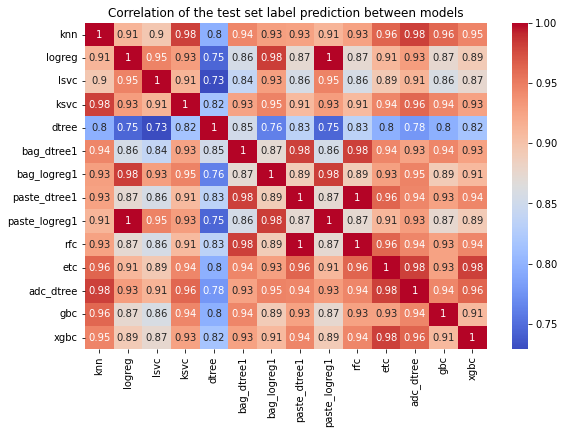

In [94]:
# Plot a heatmap of all correlations for easier visualization
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,6))
g = sns.heatmap(pred.corr(), annot=True, cmap='coolwarm', ax=ax)
g.set_title('Correlation of the test set label prediction between models')

In [95]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_bottom_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=True)
    return au_corr[0:n]



In [96]:
print("Bottom Absolute Correlations")
print(get_bottom_abs_correlations(pred, 5))

Bottom Absolute Correlations
lsvc    dtree            0.728875
dtree   paste_logreg1    0.745461
logreg  dtree            0.745461
dtree   bag_logreg1      0.762399
        adc_dtree        0.778527
dtype: float64


# Stacking

## Voting top 5

In [97]:
logreg_grid.best_estimator_

LogisticRegression(C=1, max_iter=1000)

In [99]:
from sklearn.ensemble import VotingClassifier

In [100]:
vclf1 = VotingClassifier(estimators=
                              [('lsvc', lsvc_grid.best_estimator_), 
                               ('logreg', logreg_grid.best_estimator_), 
                               ('ksvc', ksvc_grid.best_estimator_),
                               ('paste_logreg1', paste_logreg1_grid.best_estimator_),
                               ('bag_logreg1', bag_logreg1_grid.best_estimator_)
                              ], )
vclf1_param = {
              'voting' : ['hard','soft'],
             }
vclf1_grid = GridSearchCV(vclf1, vclf1_param,cv=5, return_train_score=True, )
vclf1_grid.fit(X_train,y_train)


GridSearchCV(cv=5,
             estimator=VotingClassifier(estimators=[('lsvc',
                                                     SVC(C=100, kernel='linear',
                                                         probability=True)),
                                                    ('logreg',
                                                     LogisticRegression(C=1,
                                                                        max_iter=1000)),
                                                    ('ksvc',
                                                     SVC(C=10, gamma=0.01,
                                                         probability=True)),
                                                    ('paste_logreg1',
                                                     BaggingClassifier(base_estimator=LogisticRegression(C=1),
                                                                       bootstrap=False,
                                                                       max_samples=0.8,
                                                                       random_state=0)),
                                                    ('bag_logreg1',
                                                     BaggingClassifier(base_estimator=LogisticRegression(C=1),
                                                                       max_samples=0.8,
                                                                       n_estimators=100,
                                                                       oob_score=True,
                                                                       random_state=0))]),
             param_grid={'voting': ['hard', 'soft']}, return_train_score=True)

In [101]:
print(f'Best Mean Cross Validation Score is {vclf1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {vclf1_grid.best_params_}')
print(f'Train score is {vclf1_grid.score(X_train,y_train)}')
print(f'Test score is {vclf1_grid.score(X_test,y_test)}')
print(f'Val score is {vclf1_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.9765984654731458
Best Mean Cross Validation Score is {'voting': 'hard'}
Train score is 0.9882697947214076
Test score is 0.9649122807017544
Val score is 0.9649122807017544


In [102]:
vclf2 = VotingClassifier(estimators=
                              [('lsvc', lsvc_grid.best_estimator_), 
                               ('logreg', logreg_grid.best_estimator_), 
                               ('ksvc', ksvc_grid.best_estimator_),
                               ('paste_logreg1', paste_logreg1_grid.best_estimator_),
                                                            ], )
vclf2_param = {
              'voting' : ['hard','soft'],
             }
vclf2_grid = GridSearchCV(vclf2, vclf2_param,cv=5, return_train_score=True, )
vclf2_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=VotingClassifier(estimators=[('lsvc',
                                                     SVC(C=100, kernel='linear',
                                                         probability=True)),
                                                    ('logreg',
                                                     LogisticRegression(C=1,
                                                                        max_iter=1000)),
                                                    ('ksvc',
                                                     SVC(C=10, gamma=0.01,
                                                         probability=True)),
                                                    ('paste_logreg1',
                                                     BaggingClassifier(base_estimator=LogisticRegression(C=1),
                                                                       bootstrap=False,
                                                                       max_samples=0.8,
                                                                       random_state=0))]),
             param_grid={'voting': ['hard', 'soft']}, return_train_score=True)

In [103]:
print(f'Best Mean Cross Validation Score is {vclf2_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {vclf2_grid.best_params_}')
print(f'Train score is {vclf2_grid.score(X_train,y_train)}')
print(f'Test score is {vclf2_grid.score(X_test,y_test)}')
print(f'Val score is {vclf2_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.979539641943734
Best Mean Cross Validation Score is {'voting': 'hard'}
Train score is 0.9853372434017595
Test score is 0.9649122807017544
Val score is 0.9649122807017544


## Voting Least Correlated 

In [104]:
vclf3 = VotingClassifier(estimators=
                              [('dtree', dtree_grid.best_estimator_), 
                               ('logreg', logreg_grid.best_estimator_), 
                               ('gbc', gbc_grid.best_estimator_),
                              ], )
vclf3_param = {
              'voting' : ['hard','soft'],
             }
vclf3_grid = GridSearchCV(vclf3, vclf3_param,cv=5, return_train_score=True, )
vclf3_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=VotingClassifier(estimators=[('dtree',
                                                     DecisionTreeClassifier(max_depth=8,
                                                                            max_leaf_nodes=5,
                                                                            min_samples_split=3,
                                                                            splitter='random')),
                                                    ('logreg',
                                                     LogisticRegression(C=1,
                                                                        max_iter=1000)),
                                                    ('gbc',
                                                     GradientBoostingClassifier(learning_rate=1.0,
                                                                                max_depth=2,
                                                                                random_state=42))]),
             param_grid={'voting': ['hard', 'soft']}, return_train_score=True)

In [105]:
print(f'Best Mean Cross Validation Score is {vclf3_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {vclf3_grid.best_params_}')
print(f'Train score is {vclf3_grid.score(X_train,y_train)}')
print(f'Test score is {vclf3_grid.score(X_test,y_test)}')
print(f'Val score is {vclf3_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.9618499573742542
Best Mean Cross Validation Score is {'voting': 'hard'}
Train score is 0.9912023460410557
Test score is 0.9736842105263158
Val score is 0.9736842105263158


## Stacking Top 5

https://towardsdatascience.com/stacking-made-easy-with-sklearn-e27a0793c92b

In [107]:
from sklearn.ensemble import StackingClassifier

In [108]:
sclf1 = StackingClassifier(estimators=
                              [('lsvc', lsvc_grid.best_estimator_), 
                               ('logreg', logreg_grid.best_estimator_), 
                               ('ksvc', ksvc_grid.best_estimator_),
                               ('paste_logreg1', paste_logreg1_grid.best_estimator_),
                               ('bag_logreg1', bag_logreg1_grid.best_estimator_)
                              ], final_estimator=LogisticRegression())
sclf1_param = {
              'final_estimator__C' : [0.1,0.2],
              'stack_method':['auto', 'predict_proba']
             }
sclf1_grid = GridSearchCV(sclf1, sclf1_param,cv=5, return_train_score=True, )
sclf1_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=StackingClassifier(estimators=[('lsvc',
                                                       SVC(C=100,
                                                           kernel='linear',
                                                           probability=True)),
                                                      ('logreg',
                                                       LogisticRegression(C=1,
                                                                          max_iter=1000)),
                                                      ('ksvc',
                                                       SVC(C=10, gamma=0.01,
                                                           probability=True)),
                                                      ('paste_logreg1',
                                                       BaggingClassifier(base_estimator=LogisticRegression(C=1),
                                                                         bootstrap=False,
                                                                         max_samples=0.8,
                                                                         random_state=0)),
                                                      ('bag_logreg1',
                                                       BaggingClassifier(base_estimator=LogisticRegression(C=1),
                                                                         max_samples=0.8,
                                                                         n_estimators=100,
                                                                         oob_score=True,
                                                                         random_state=0))],
                                          final_estimator=LogisticRegression()),
             param_grid={'final_estimator__C': [0.1, 0.2],
                         'stack_method': ['auto', 'predict_proba']},
             return_train_score=True)

In [ ]:
print(f'Best Mean Cross Validation Score is {sclf1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {sclf1_grid.best_params_}')
print(f'Train score is {sclf1_grid.score(X_train,y_train)}')
print(f'Test score is {sclf1_grid.score(X_test,y_test)}')
print(f'Val score is {sclf1_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.9765984654731458
Best Mean Cross Validation Score is {'final_estimator__C': 0.1, 'stack_method': 'auto'}
Train score is 0.9882697947214076
Test score is 0.9649122807017544
Val score is 0.9649122807017544


## Stacking Least Correlated

In [110]:
sclf2 = StackingClassifier(estimators=
                            [('dtree', dtree_grid.best_estimator_), 
                             ('logreg', logreg_grid.best_estimator_), 
                            ], 
                            final_estimator=
                            XGBClassifier(random_state=42,objective= 'binary:logistic',eval_metric='error')
                           )
sclf2_param = {
              'final_estimator__max_depth' : [2,6],
              'final_estimator__n_estimators' : [50,150],
              'final_estimator__learning_rate' : [0.1,0.6,0.8],
              'final_estimator__min_child_weight' : [1,3,7],
              'final_estimator__subsample':[0.6,0.9,1],
              'stack_method':['auto', 'predict_proba']
             }
sclf2_grid = GridSearchCV(sclf2, sclf2_param,cv=5, return_train_score=True, )
sclf2_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=StackingClassifier(estimators=[('dtree',
                                                       DecisionTreeClassifier(max_depth=8,
                                                                              max_leaf_nodes=5,
                                                                              min_samples_split=3,
                                                                              splitter='random')),
                                                      ('logreg',
                                                       LogisticRegression(C=1,
                                                                          max_iter=1000))],
                                          final_estimator=XGBClassifier(base_score=None,
                                                                        booster=None,
                                                                        colsample_bylevel=None,
                                                                        colsample_bynode=None,
                                                                        colsample_bytree=None,
                                                                        enable_categor...
                                                                        subsample=None,
                                                                        tree_method=None,
                                                                        validate_parameters=None,
                                                                        verbosity=None)),
             param_grid={'final_estimator__learning_rate': [0.1, 0.6, 0.8],
                         'final_estimator__max_depth': [2, 6],
                         'final_estimator__min_child_weight': [1, 3, 7],
                         'final_estimator__n_estimators': [50, 150],
                         'final_estimator__subsample': [0.6, 0.9, 1],
                         'stack_method': ['auto', 'predict_proba']},
             return_train_score=True)

In [111]:
print(f'Best Mean Cross Validation Score is {sclf2_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {sclf2_grid.best_params_}')
print(f'Train score is {sclf2_grid.score(X_train,y_train)}')
print(f'Test score is {sclf2_grid.score(X_test,y_test)}')
print(f'Val score is {sclf2_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.98537936913896
Best Mean Cross Validation Score is {'final_estimator__learning_rate': 0.6, 'final_estimator__max_depth': 6, 'final_estimator__min_child_weight': 1, 'final_estimator__n_estimators': 150, 'final_estimator__subsample': 0.9, 'stack_method': 'auto'}
Train score is 0.9824046920821115
Test score is 0.9649122807017544
Val score is 0.9736842105263158
